# Benchmarks Hénon Heiles

<ul id="top">
    <li><a href="#Loading-packages-and-functions">Loading packages and functions</a></li>
    <li><a href="#Initial-value-problem:-Hénon-Heiles">Initial value problem: Hénon-Heiles</a></li>
    <li><a href="#IRKGL16-integrations">IRKGL16-integrations</a></li>
    <li><a href="#2nd-order-explicit-symplectic-integrations">2nd order explicit symplectic integrations</a></li>
    <li><a href="#Benchmarks-diagrams">Benchmarks diagrams</a></li>
    <ul>
        <li><a href="#Work-precison-diagrams">Work-precison-diagrams</a></li>
        <li><a href="#Error-in-Energy">Error in Energy</a></li>
        <li><a href="#Error-in-Solution">Error in Solution</a></li>
    </ul>
</ul>

## Loading packages and functions

In [1]:
using LinearAlgebra
using Plots
using OrdinaryDiffEq

PATH_IRKGL="../../../../IRKGaussLegendre.jl-master/IRKGaussLegendre.jl-master/"
include(string(PATH_IRKGL,"src/IRKGaussLegendre.jl"))
using .IRKGaussLegendre  ## bertsio lokala exekutatzeko  

PATH_Splitting="../../"
include(string(PATH_Splitting,"/src/SplittingMethods.jl"))
using .SplittingMethods  ## bertsio lokala exekutatzeko  

include("../Aux_functions.jl")

lcm_floats_vector (generic function with 1 method)

##### <a href="#top">Back to the top</a>

## Initial value problem: Hénon-Heiles

We consider the Hénon-Heiles model which is Hamiltonian with

\begin{align*}
H(q,p)=\frac{1}{2} (p_1^2+p_2^2)+\frac{1}{2}(q_1^2+q_2^2)+q_1^2q_2-\frac{1}{3}q_2^3
\end{align*}

and the corresponding system

\begin{align*}
& \frac{dq_1}{dt}=p_1, \quad 
\frac{dq_2}{dt}=p_2, \\
& \frac{dp_1}{dt}=-q_1-2q_1q_2, \quad 
 \frac{dp_2}{dt}=-q_2-q_1^2+q_2^2
\end{align*}

In [2]:
PATH_ODES=string(PATH_IRKGL,"ODEProblems/")
include(string(PATH_ODES,"HenonHeiles.jl"));

include(string(PATH_Splitting,"/ODEProblems/HenonHeiles.jl"))

flowH2HenonHeiles! (generic function with 1 method)

In [3]:
# Gemetric Numerical Integration. Structure-Preserving Algorithms for Ordinary Differential Equations, page 15

q0=[0,3/10]
p0=[0, 2/10]

# Non-Chaotic solution H0=1/12

H0=1/12
U0=Potential_U(q0[1],q0[2])
p0[1]=sqrt(2*H0-2*U0-p0[2]^2)
parms = [0.]

u0=vcat(q0,p0)
u0_B=BigFloat.(u0)

t0 = 0.
tF = 2*pi*1e4
tspan=(t0,tF);

##### <a href="#top">Back to the top</a>

## IRKGL16 integrations

In [4]:
prob = ODEProblem{true,SciMLBase.FullSpecialize}(HenonHeilesODE!, u0, tspan, parms)

HAM=HenonHeliesHam
@show(HAM(u0, parms));

HAM(u0, parms) = 0.08333333333333333


,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0

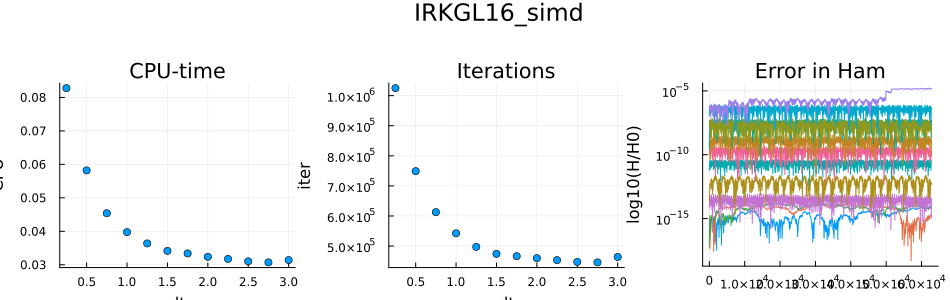

,0.25,0.5,0.75,1.0,1.25,1.5,1.75,2.0,2.25,2.5,2.75,3.0

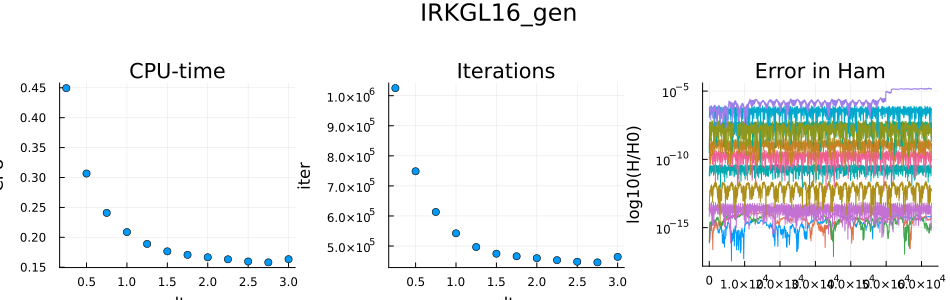

In [5]:
ddt0_irk16=collect(1/4:1/4:3)  
nruns=1

alg=IRKGL16(simd=true, second_order_ode=true)
sols_irk16_simd=run_many_IRKGL16(alg, prob, ddt0_irk16, HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_simd",prob,HAM,sols_irk16_simd)
display(fig)
#
alg=IRKGL16(simd=false, second_order_ode=true)
sols_irk16_gen=run_many_IRKGL16(alg,prob,ddt0_irk16,HAM, nruns=nruns)
fig=plots_IRKGL16("IRKGL16_gen",prob,HAM,sols_irk16_gen)
display(fig)

In [6]:
[sols_irk16_simd.dts sols_irk16_simd.retcodes sols_irk16_simd.iters sols_irk16_simd.cpus sols_irk16_simd.MaxΔHlocal]

12×5 Matrix{Float64}:
 0.25  1.0       1.02503e6  0.082768   3.52383e-16
 0.5   1.0  749044.0        0.0581908  4.09499e-16
 0.75  1.0  612720.0        0.045396   5.91807e-16
 1.0   1.0  542376.0        0.0397561  3.13653e-14
 1.25  1.0  497225.0        0.0363818  1.26389e-12
 1.5   1.0  474100.0        0.0341501  2.5221e-11
 1.75  1.0  466289.0        0.0333903  3.05756e-10
 2.0   1.0  459654.0        0.0323833  2.56567e-9
 2.25  1.0  453142.0        0.0317541  1.6192e-8
 2.5   1.0  447263.0        0.0310341  8.15254e-8
 2.75  1.0  445773.0        0.0307216  3.40396e-7
 3.0   1.0  463823.0        0.0313993  6.09815e-6

In [7]:
[sols_irk16_gen.dts sols_irk16_gen.retcodes sols_irk16_gen.iters sols_irk16_gen.cpus sols_irk16_gen.MaxΔHlocal]

12×5 Matrix{Float64}:
 0.25  1.0       1.02507e6  0.449383  3.52817e-16
 0.5   1.0  748567.0        0.306592  4.76586e-16
 0.75  1.0  613189.0        0.240827  7.55381e-16
 1.0   1.0  542224.0        0.208722  3.13596e-14
 1.25  1.0  496622.0        0.188951  1.26397e-12
 1.5   1.0  474419.0        0.176536  2.52209e-11
 1.75  1.0  465849.0        0.170652  3.05756e-10
 2.0   1.0  459563.0        0.166642  2.56567e-9
 2.25  1.0  452933.0        0.163261  1.6192e-8
 2.5   1.0  447739.0        0.1596    8.15254e-8
 2.75  1.0  445592.0        0.158111  3.40396e-7
 3.0   1.0  463919.0        0.163436  6.09815e-6

<a href="#top">Back to the top</a>

## 2nd order explicit symplectic integrations

In [8]:
flows=[flowH1HenonHeiles!, flowH2HenonHeiles!]
prob=SplittingProblem(flows, u0, tspan, parms)

HAM=HenonHeliesHam
@show(HAM(u0,parms))

HAM(u0, parms) = 0.08333333333333333


0.08333333333333333

### Composition methods

In [9]:
ddt0_split=collect(1/20:1/20:0.9)/8
nruns=1

s=1; r=2
alg=Splitting_alg(r=r, rkn=false)
sols_split_r2=run_many_Splitting(s, alg, prob, ddt0_split, HAM, nruns=nruns)
#fig=plots_Splitting("Split r=2", alg, prob, HAM, sols_split_r2)
#display(fig)
#
s=5; r=4
alg=Splitting_alg(r=r, rkn=false)
sols_split_r4=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=13; r=6
alg=Splitting_alg(r=r, rkn=false)
sols_split_r6=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=21; r=8
alg=Splitting_alg(r=r, rkn=false)
sols_split_r8=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=35; r=10
alg=Splitting_alg(r=r, rkn=false)
sols_split_r10=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns);

,0.00625,0.0125,0.01875,0.025,0.03125,0.0375,0.04375,0.05,0.05625,0.0625,0.06875,0.075,0.08125,0.0875,0.09375,0.1,0.10625,0.1125,0.03125,0.0625,0.09375,0.125,0.15625,0.1875,0.21875,0.25,0.28125,0.3125,0.34375,0.375,0.40625,0.4375,0.46875,0.5,0.53125,0.5625,0.08125,0.1625,0.24375,0.325,0.40625,0.4875,0.56875,0.65,0.7312500000000001,0.8125,0.89375,0.975,1.0562500000000001,1.1375,1.21875,1.3,1.3812499999999999,1.4625000000000001,0.13125,0.2625,0.39375,0.525,0.65625,0.7875,0.91875,1.05,1.1812500000000001,1.3125,1.44375,1.575,1.70625,1.8375,1.96875,2.1,2.2312499999999997,2.3625000000000003,0.21875,0.4375,0.65625,0.875,1.09375,1.3125,1.53125,1.75,1.96875,2.1875,2.40625,2.625,2.84375,3.0625,3.28125,3.5,3.71875,3.9375

In [10]:
[sols_split_r2.MaxΔHlocal sols_split_r4.MaxΔHlocal sols_split_r6.MaxΔHlocal sols_split_r8.MaxΔHlocal sols_split_r10.MaxΔHlocal] 

18×5 Matrix{Float64}:
 1.03014e-7   7.17971e-10  7.87332e-12  5.57344e-14    1.6265e-14
 8.24108e-7   2.29703e-8   1.00631e-9   2.78056e-11    2.98881e-11
 2.78136e-6   1.7437e-7    1.7152e-8    1.05778e-9     2.52832e-9
 6.59287e-6   7.34442e-7   1.28065e-7   1.38847e-8     5.80523e-8
 1.28767e-5   2.2397e-6    6.08045e-7   1.01517e-7     6.49323e-7
 2.22504e-5   5.56933e-6   2.16731e-6   5.12142e-7     4.59288e-6
 3.53338e-5   1.20269e-5   6.33629e-6   1.9968e-6      2.36021e-5
 5.27431e-5   2.3424e-5    1.60215e-5   6.43992e-6     9.57784e-5
 7.50975e-5   4.21616e-5   3.62556e-5   1.79653e-5     0.000323621
 0.000103015  7.13056e-5   7.51386e-5   4.46431e-5     0.000944105
 0.000137115  0.000114675  0.000145015  0.000100991    0.00244207
 0.000178014  0.000176897  0.000263907  0.000211311    0.00567601
 0.000226327  0.000263486  0.000457072  0.00040972     0.0123959
 0.000282685  0.000380975  0.00075903   0.000765183    0.0254186
 0.000347701  0.000536817  0.00121474   0.00134876   

### RKN symplectic integrations

In [11]:
s=14; r=6
nruns=1

alg=Splitting_alg(r=r, rkn=true)
sols_split_rkn6=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns)
#
s=19; r=8; rkn=true
alg=Splitting_alg(r=r, rkn=true)
sols_split_rkn8=run_many_Splitting(s, alg, prob, s*ddt0_split, HAM, nruns=nruns);

,0.08750000000000001,0.17500000000000002,0.2625,0.35000000000000003,0.4375,0.525,0.6124999999999999,0.7000000000000001,0.7875,0.875,0.9625000000000001,1.05,1.1375,1.2249999999999999,1.3125,1.4000000000000001,1.4875,1.575,0.11875000000000001,0.23750000000000002,0.35625,0.47500000000000003,0.59375,0.7125,0.8312499999999999,0.9500000000000001,1.06875,1.1875,1.3062500000000001,1.425,1.54375,1.6624999999999999,1.78125,1.9000000000000001,2.01875,2.1375

In [12]:
[sols_split_rkn6.MaxΔHlocal sols_split_rkn8.MaxΔHlocal] 

18×2 Matrix{Float64}:
 1.03997e-14  2.11885e-14
 1.0392e-12   1.02634e-11
 1.40864e-11  3.90887e-10
 1.00957e-10  5.13821e-9
 5.90947e-10  3.76443e-8
 2.74491e-9   1.90278e-7
 1.18595e-8   7.43489e-7
 4.42191e-8   2.40473e-6
 1.36014e-7   6.72272e-6
 3.63734e-7   1.67435e-5
 8.72643e-7   3.79395e-5
 1.92037e-6   7.94958e-5
 3.93305e-6   0.000155818
 7.58966e-6   0.00028843
 1.3909e-5    0.000506942
 2.43797e-5   0.000853755
 4.11048e-5   0.00138083
 6.69846e-5   0.00215529

<a href="#top">Back to the top</a>

## Benchmarks diagrams

### Work-precison diagrams

In [13]:
[ddt0_irk16 sols_irk16_simd.MaxΔHlocal  sols_irk16_simd.cpus]

12×3 Matrix{Float64}:
 0.25  3.52383e-16  0.082768
 0.5   4.09499e-16  0.0581908
 0.75  5.91807e-16  0.045396
 1.0   3.13653e-14  0.0397561
 1.25  1.26389e-12  0.0363818
 1.5   2.5221e-11   0.0341501
 1.75  3.05756e-10  0.0333903
 2.0   2.56567e-9   0.0323833
 2.25  1.6192e-8    0.0317541
 2.5   8.15254e-8   0.0310341
 2.75  3.40396e-7   0.0307216
 3.0   6.09815e-6   0.0313993

In [14]:
[ddt0_split sols_split_r2.MaxΔHlocal sols_split_r2.cpus]

18×3 Matrix{Float64}:
 0.00625  1.03014e-7   0.231941
 0.0125   8.24108e-7   0.114692
 0.01875  2.78136e-6   0.0777911
 0.025    6.59287e-6   0.0591099
 0.03125  1.28767e-5   0.0480624
 0.0375   2.22504e-5   0.0390336
 0.04375  3.53338e-5   0.034759
 0.05     5.27431e-5   0.0299967
 0.05625  7.50975e-5   0.0259153
 0.0625   0.000103015  0.0232497
 0.06875  0.000137115  0.0220135
 0.075    0.000178014  0.0191842
 0.08125  0.000226327  0.0183255
 0.0875   0.000282685  0.0175544
 0.09375  0.000347701  0.0157584
 0.1      0.000421994  0.0145348
 0.10625  0.000506174  0.0134353
 0.1125   0.000600856  0.0137628

In [15]:
sols2plot=[sols_irk16_simd, sols_irk16_gen,
           sols_split_r2, sols_split_r4, sols_split_r6, sols_split_r8, sols_split_r10,
           sols_split_rkn6, sols_split_rkn8]

labels2plot=["IRKGL16(simd)", "IRKGL16(gen)", 
              "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)", 
              "BM02(rkn6)", "BCE22(rkn8)" ]
colors2plot = [:red, :blue, :green, :orange, :purple, :cyan, :magenta, :teal, :gold];

In [16]:
index0=4   # IRKGL16: index0=4 (exact solution)
idx=6     # IRKGL16:  index1=8 optimum step-size

index=[idx]
compute_index_ge_cpu!(index, sols_irk16_simd.cpus[idx], sols2plot[2:end])

for i in 1:length(index)
    
    k=index[i]
    println(k, " , ", labels2plot[i], " , ", sols2plot[i].dts[k], " , ", sols2plot[i].cpus[k])
    
end

6 , IRKGL16(simd) , 1.5 , 0.034150129
12 , IRKGL16(gen) , 3.0 , 0.163435614
7 , Strang(r=2) , 0.04375 , 0.034759044
3 , SUZ90(r=4) , 0.09375 , 0.039625119
3 , SS05(r=6) , 0.24375 , 0.035939111
3 , SS05(r=8) , 0.39375 , 0.034924754
3 , SS05(r=10) , 0.65625 , 0.034334644
3 , BM02(rkn6) , 0.2625 , 0.036007987
3 , BCE22(rkn8) , 0.35625 , 0.034997355


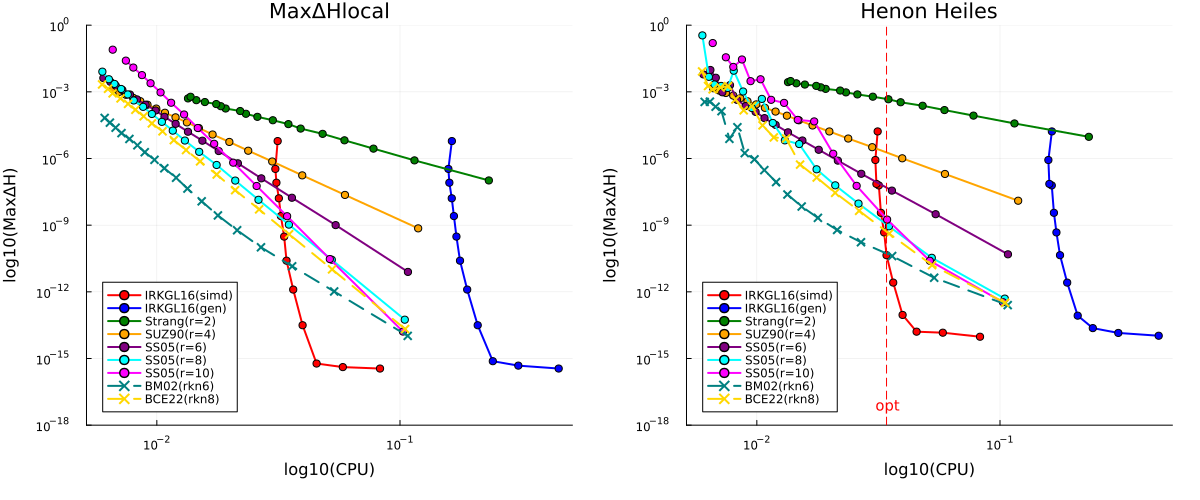

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict

In [33]:
yrange=(1e-18, 1e0)

sols=sols_irk16_simd
pl1=plot( sols.cpus , sols.MaxΔHlocal, scale=:log10,
          markershape=:circle, lw=2,
          ylimits=yrange, 
          label=labels2plot[1], color=colors2plot[1],
          legend=:bottomleft,
          title="MaxΔHlocal", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")

for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
    if occursin("rkn", labels2plot[i])
        
        plot!(pl1, sols.cpus , sols.MaxΔHlocal, 
        markershape=:xcross, lw=2, ls=:dash,
        label=labels2plot[i], color=colors2plot[i],
        scale=:log10)
    
    else
        plot!(pl1, sols.cpus , sols.MaxΔHlocal, 
        markershape=:circle, lw=2,
        label=labels2plot[i], color=colors2plot[i],
        scale=:log10)
    end
    
end

#########################################

sols=sols_irk16_simd
pl2=plot( sols.cpus , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange, 
         label=labels2plot[1], color=colors2plot[1],
         legend=:bottomleft,
         title="Henon Heiles", xlabel="log10(CPU)", ylabel="log10(MaxΔH)")


for i in 2:length(sols2plot)
    
    sols=sols2plot[i]
    
   if occursin("rkn", labels2plot[i])
        
        plot!(pl2, sols.cpus , sols.MaxΔHglobal, 
        markershape=:xcross, lw=2, ls=:dash,
        label=labels2plot[i], color=colors2plot[i],
        scale=:log10)
    
    else
        plot!(pl2, sols.cpus , sols.MaxΔHglobal, 
        markershape=:circle, lw=2,
        label=labels2plot[i], color=colors2plot[i],
        scale=:log10)
    end

end

vline!(pl2, [sols_irk16_simd.cpus[index[1]]], line=:dash, label="", color=:red)
annotate!((sols_irk16_simd.cpus[index[1]]+0.38, 0.05), text("opt", :red, 10, :center))

plot(pl1, pl2, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


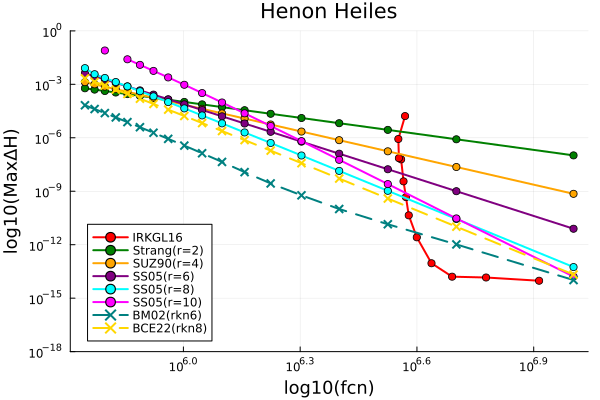

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [34]:
fcn=8*(sols_irk16_simd.iters)


sols=sols_irk16_simd
pl3=plot( fcn , sols.MaxΔHglobal, scale=:log10,
         markershape=:circle, lw=2,
         ylimits=yrange,    
         label="IRKGL16", color=colors2plot[1],
         title="Henon Heiles", 
         xlabel="log10(fcn)", ylabel="log10(MaxΔH)",
         legend=:bottomleft,
         guidefont=font(12), labelsize=10)


for i in 3:length(sols2plot)
       
   sols=sols2plot[i]
    
   if occursin("rkn", labels2plot[i])
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
       markershape=:xcross, lw=2, ls=:dash,
       label=labels2plot[i], color=colors2plot[i],
       scale=:log10)
        
   else 
       plot!(pl3, sols.nflowsH3 , sols.MaxΔHlocal, 
             markershape=:circle, lw=2,
             label=labels2plot[i], color=colors2plot[i],
             scale=:log10)
   end

end

display(pl3)

In [35]:
savefig("./figures/Fig3a.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Henon-Heiles-Non-Chaotic/figures/Fig3a.pdf"

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


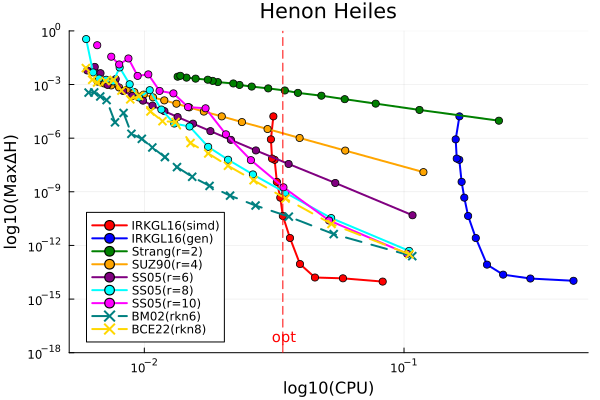

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


In [37]:
plot(pl2)

In [38]:
savefig("./figures/Fig3b.pdf")

┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194
┌ Warning: No strict ticks found
└ @ PlotUtils ~/.julia/packages/PlotUtils/dVEMd/src/ticks.jl:194


"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Henon-Heiles-Non-Chaotic/figures/Fig3b.pdf"

<a href="#top">Back to the top</a>

### Error in Energy

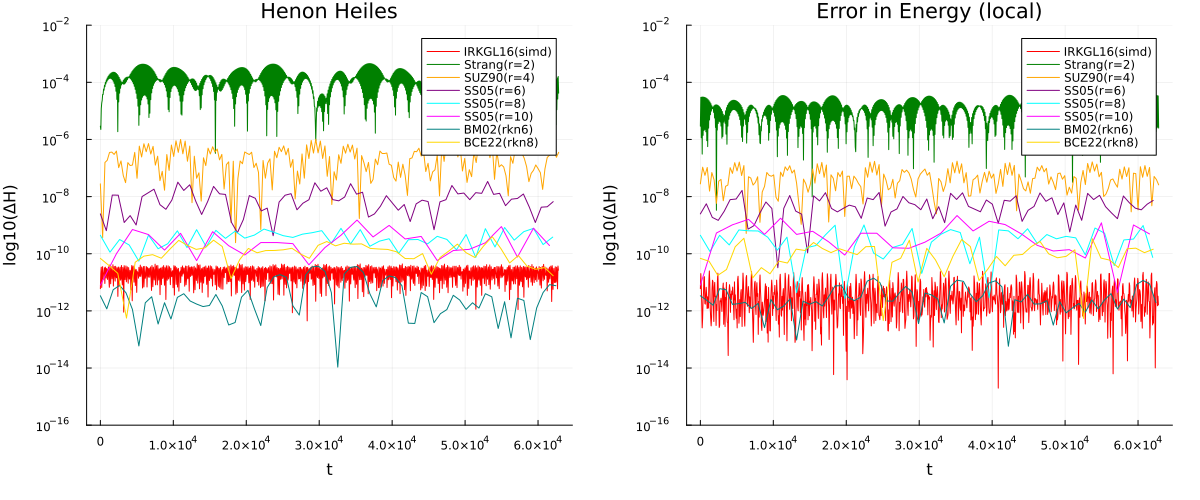

In [22]:
yrange=(1e-16, 1e-2)

onesols2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]],
              sols_split_rkn6.sols[index[8]], sols_split_rkn8.sols[index[9]]]


HAM=HenonHeliesHam
H0=HAM(u0_B,parms)


H = [HAM(BigFloat.(u),parms) for u in sols_irk16_simd.sols[index[1]].u]
ΔH0 = @. Float64(abs(H/H0-1))
ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))

m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_irk16[index[1]])),1000))

pl3=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0[2:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Henon Heiles",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10, legend=:topright)

pl4=plot(sols_irk16_simd.sols[index[1]].t[2:m0:end], abs.(ΔH0loc[1:m0:end]),
        ylimits=yrange,
        xlabel="t", ylabel="log10(ΔH)",title="Error in Energy (local)",
        label=labels2plot[1],color=colors2plot[1],
        yscale=:log10)

# splitting

for k in 2:length(onesols2plot)
    m0 = max(1,div(Int64(ceil((tF-t0)/ddt0_split[index[k+1]])),1000))
    solk=onesols2plot[k]
    labelk=labels2plot[k+1]
    colork=colors2plot[k+1]
    H = [HAM(BigFloat.(u),parms) for u in solk.u]
    ΔH0 = @. Float64(abs(H/H0-1))
    ΔH0loc = @. Float64(abs((H[2:end] / H[1:end-1]) - 1))
    plot!(pl3, solk.t[2:m0:end], abs.(ΔH0[2:m0:end]), yscale=:log10, label=labelk, color=colork)
    plot!(pl4, solk.t[2:m0:end], abs.(ΔH0loc[1:m0:end]), yscale=:log10, label=labelk, color=colork)
end


fig=plot(pl3, pl4, layout=(1,2), size=(1200,500), 
    bottom_margin=10Plots.mm,
    left_margin=5Plots.mm, right_margin=5Plots.mm)

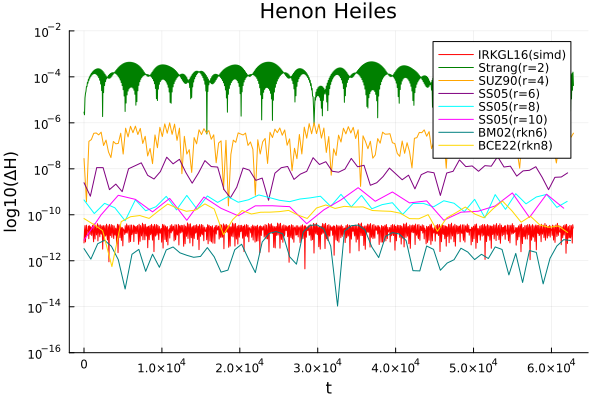

In [23]:
plot(pl3)

In [24]:
savefig("./figures/Fig3c.pdf")

"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Henon-Heiles-Non-Chaotic/figures/Fig3c.pdf"

<a href="#top">Back to the top</a>

### Error in Solution

In [25]:
errors2plot=[sols_irk16_simd.sols[index[1]], sols_split_r2.sols[index[3]], sols_split_r4.sols[index[4]],
              sols_split_r6.sols[index[5]],   sols_split_r8.sols[index[6]], sols_split_r10.sols[index[7]],
              sols_split_rkn6.sols[index[8]], sols_split_rkn8.sols[index[9]]]

ddt02plot=[sols_irk16_simd.dts[index[1]], sols_split_r2.dts[index[3]], sols_split_r4.dts[index[4]],
           sols_split_r6.dts[index[5]],   sols_split_r8.dts[index[6]], sols_split_r10.dts[index[7]],
           sols_split_rkn6.dts[index[8]], sols_split_rkn8.dts[index[9]]]

labels2plot_er=["IRKGL16(simd)",  
                "Strang(r=2)", "SUZ90(r=4)", "SS05(r=6)", "SS05(r=8)", "SS05(r=10)",
                "BM02(rkn6)", "BCE22(rkn8)"] 

colors2plot_er=[:red, :green, :orange, :purple, :cyan, :magenta, :teal, :gold];

In [26]:
yrange=(1e-12, 1e1)


ploterr_q=plot(title="Henon Heiles",
                ylims=yrange,
                yscale=:log10,
                legend=:bottomright,
                xlabel="t",
                ylabel="error in position")

ploterr_p=plot(title="Henon Heiles",
                ylims=yrange,
                yscale=:log10,
                legend=:bottomright,
                xlabel="t",
                ylabel="error in momentum")


for k in 1:length(errors2plot)

        
    w=lcm_floats_vector(vcat(ddt0_irk16[index0],ddt02plot[k]))
    ii=Int64.(w./(vcat(ddt0_irk16[index0],ddt02plot[k]))).+1
    
    v0=sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:3*ii[1]] 
    v1=errors2plot[k].t[ii[2]:ii[2]-1:3*ii[2]]
    
    println("k=", k, ",",labels2plot[k],",", v0 )
    println("k=", k, ",",labels2plot[k],",", v1 )
    println("*****************************")
    
    
    errorq=map((u,u1)->norm(BigFloat.(u[1:2])-BigFloat.(u1[1:2]))/norm(BigFloat.(u1[1:2])), 
                      errors2plot[k].u[ii[2]:ii[2]-1:end], sols_irk16_simd.sols[index0].u[ii[1]:ii[1]-1:end])

    errorp=map((u,u1)->norm(BigFloat.(u[3:4])-BigFloat.(u1[3:4]))/norm(BigFloat.(u1[3:4])), 
                      errors2plot[k].u[ii[2]:ii[2]-1:end], sols_irk16_simd.sols[index0].u[ii[1]:ii[1]-1:end])
      
    
    #tt=sols_irk16_simd.sols[index0].t[ii[1]:ii[1]-1:end]
    tt=errors2plot[k].t[ii[2]:ii[2]-1:end]
    
    plot!(ploterr_q, tt, errorq,
          label=labels2plot_er[k],color=colors2plot_er[k])
    
    plot!(ploterr_p, tt, errorp,
          label=labels2plot_er[k],color=colors2plot_er[k])

    
end

k=1,IRKGL16(simd),[3.0, 6.0, 9.0]
k=1,IRKGL16(simd),[3.0, 6.0, 9.0, 12.0]
*****************************
k=2,IRKGL16(gen),[7.0, 14.0, 21.0]
k=2,IRKGL16(gen),[7.0, 14.0, 21.0]
*****************************
k=3,Strang(r=2),[3.0, 6.0, 9.0]
k=3,Strang(r=2),[3.0, 6.0, 9.0]
*****************************
k=4,SUZ90(r=4),[39.0, 78.0, 117.0]
k=4,SUZ90(r=4),[39.0, 78.0, 117.0]
*****************************
k=5,SS05(r=6),[63.0, 126.0, 189.0]
k=5,SS05(r=6),[63.0, 126.0, 189.0]
*****************************
k=6,SS05(r=8),[21.0, 42.0, 63.0]
k=6,SS05(r=8),[21.0, 42.0, 63.0]
*****************************
k=7,SS05(r=10),[21.0, 42.0, 63.0]
k=7,SS05(r=10),[21.0, 42.0, 63.0]
*****************************
k=8,BM02(rkn6),[57.0, 114.0, 171.0]
k=8,BM02(rkn6),[57.0, 114.0, 171.0]
*****************************


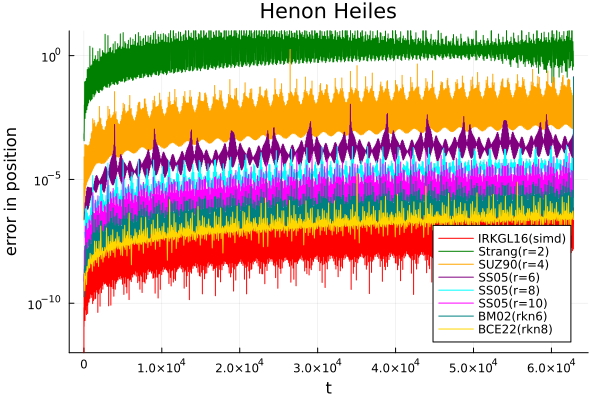

In [27]:
plot(ploterr_q)

In [28]:
savefig("./figures/Fig3d-1.pdf")

"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Henon-Heiles-Non-Chaotic/figures/Fig3d-1.pdf"

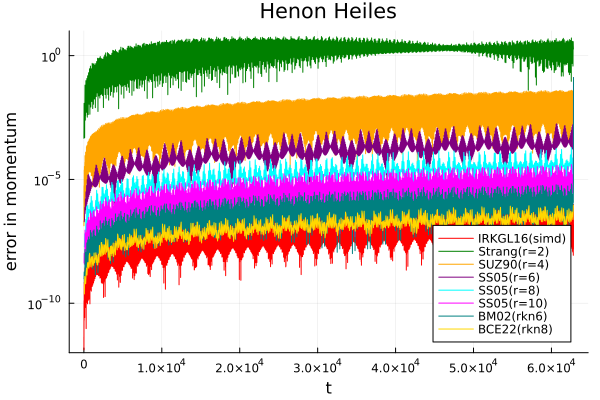

In [29]:
plot(ploterr_p)


In [30]:
savefig("./figures/Fig3d-2.pdf")

"/home/mikel/Nextcloud/Gure taldea (Ehu box)/6-Splitting-metodoak/Splitting Solvers Implementation/Experiments_Article/Henon-Heiles-Non-Chaotic/figures/Fig3d-2.pdf"